In [40]:
import os, sys
sys.path.append("C:/Users/isang/OneDrive/Desktop/DL/deep-learning-from-scratch-master")

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet

# Optimizer classes  
# Gradient Descent class
class GD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

# Stochastic Gradient Descent class
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [41]:
# Load & Read MNIST Dataset
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 1

# Experiment setup
optimizers = {
    'SGD' : SGD(lr = 0.01),
    'GD' : GD(lr = 0.01)
}

networks = {}
train_loss = {}

# Initialize networks & loss tracking  
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784,
        hidden_size_list=[100, 100, 100, 100],
        output_size=10
    )
    train_loss[key] = []

In [ ]:
# Training 
# Training loop

for epoch in range(2000):
    # Sample a mini-batch for SGD
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        # Use full dataset for GD, mini-batch for SGD
        if key == 'GD':
            x_in = x_train
            t_in = t_train
        else:
            x_in = x_batch
            t_in = t_batch

        # Compute gradients and update parameters
        grads = networks[key].gradient(x_in, t_in)
        optimizers[key].update(networks[key].params, grads)

        # Compute and record loss
        loss = networks[key].loss(x_in, t_in)
        train_loss[key].append(loss)

    # Print loss every 100 iterations
    if epoch % 100 == 0:
        print("========== epoch: " + str(epoch) + " ==========")
        for key in optimizers.keys():
            x_input = x_train if key == 'GD' else x_batch
            t_input = t_train if key == 'GD' else t_batch
            loss = networks[key].loss(x_input, t_input)
            print(f"{key}: {loss}")

========== epoch: 0 ==========
SGD: 0.45266236887822703
GD: 2.3487775372305943
========== epoch: 100 ==========
SGD: 0.609032316873912
GD: 1.615244045600307
========== epoch: 200 ==========
SGD: 0.39671596048427166
GD: 0.8443309802697119
========== epoch: 300 ==========
SGD: 0.39703247841763695
GD: 0.5690785173986177
========== epoch: 400 ==========
SGD: 0.04526158142602381
GD: 0.4579273407541614
========== epoch: 500 ==========
SGD: 0.12401093014165664
GD: 0.39999565135980003
========== epoch: 600 ==========
SGD: 0.17398543164863065
GD: 0.36391879109970016
========== epoch: 700 ==========
SGD: 0.004902041479539472
GD: 0.33834627509666054
========== epoch: 800 ==========
SGD: 0.008886236531087997
GD: 0.3186353427540344
========== epoch: 900 ==========
SGD: 0.027973611839829302
GD: 0.30259618314711445
========== epoch: 1000 ==========
SGD: 0.02968655716165137
GD: 0.2891292575678442
========== epoch: 1100 ==========
SGD: 0.07080844739553142
GD: 0.2775271473048878
========== epoch: 1200 =

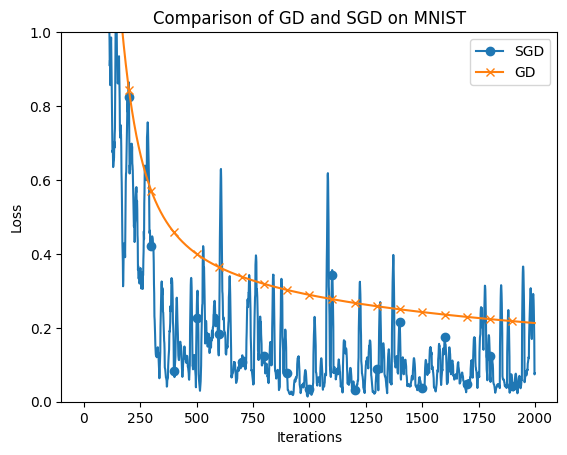

In [45]:
# === 3. Plot training loss ===

markers = {"SGD": "o", "GD": "x"}
x = np.arange(2000)

for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.ylim(0, 1)
plt.legend()
plt.title("Comparison of GD and SGD on MNIST")
plt.show()